### The Fourier Tranform


The Fourier series defines that a continuos and periodic function can be described as sines and cossines of increasingly high frequency.  Mathematically, for a function $x(t)$ with period $T$, the Fourier series representation is given by:

$$ x(t) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos \left( \frac{2\pi n t}{T} \right) + b_n \sin \left( \frac{2\pi n t}{T} \right) \right)
$$

Where $a_0$ is the average value (or DC component) of the function over one period, $a_n$ and $b_n$ are the fourier coefficients for the cossines and sine terms, respectively. Each of these two coefficients can be calculated as the inner product of the original function $x(t)$ with the corresponding basis function (sine or cosine). The inner product in this context is defined as:

$$ 
\langle f, g \rangle = \frac{2}{T} \int_{0}^{T} f(t) g(t) \, dt
$$

Therefore:

- $a_n = \left\langle x(t), \cos \left( \frac{2\pi n t}{T} \right) \right\rangle $
- $b_n = \left\langle x(t), \sin \left( \frac{2\pi n t}{T} \right) \right\rangle $

As a simple example, let's demonstrate the use of Fourier series to approximate a continuous hat function, defined from $-\pi$ to $\pi$.

so that outside the domain of definition,
the function repeats itself forever. The Fourier transform integral is essentially the limit of
a Fourier series as the length of the domain goes to infinity, which allows us to define a
function defined on $(-\infty, \infty)$

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Set plotting parameters

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 12})

# Define domain
dx = 0.001
L = np.pi
x = L * np.arange(-1 + dx, 1 + dx, dx)
n = len(x)
nquart = int(np.floor(n / 4))

# Define the function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4 / n) * np.arange(1, nquart + 1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4 / n) * np.arange(0, nquart)

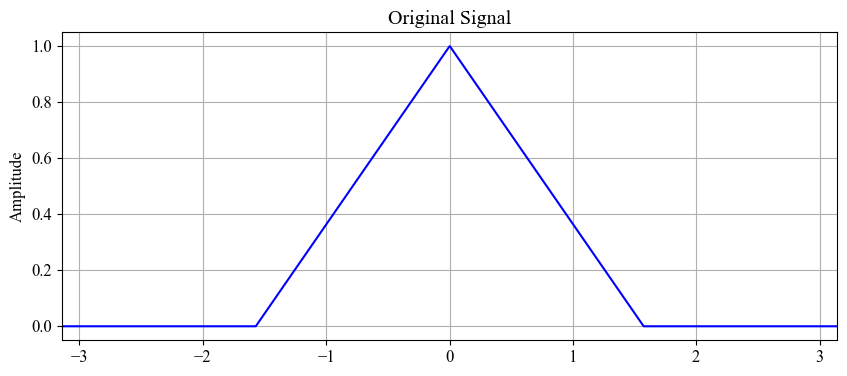

In [42]:
plt.figure(figsize=(10,4))
plt.plot(x, f, '-', color='b')
plt.title('Original Signal')
plt.ylabel('Amplitude', fontsize=12)
plt.xlim([-L, L])
plt.grid(True)
plt.show()

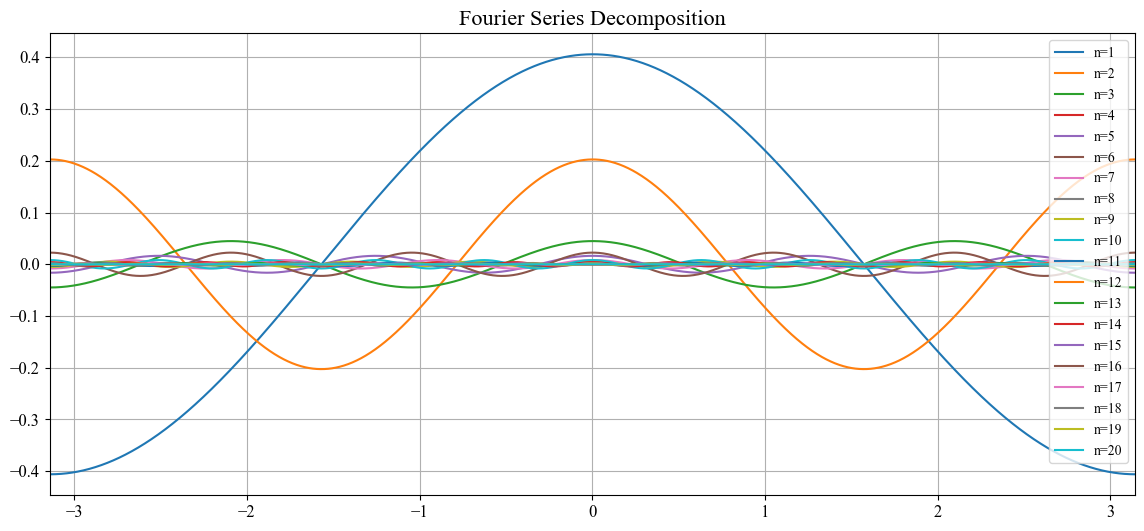

In [44]:
plt.figure(figsize=(14,6))
# Compute Fourier series and plot decomposition
cmap = plt.colormaps.get_cmap('tab10')
colors = cmap.colors
plt.gca().set_prop_cycle(color=colors)
plt.title('Fourier Series Decomposition', size=16)

# Zeroth Fourier coefficient (average value)
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0 / 2

# Initialize arrays for Fourier coefficients
A = np.zeros(20)
B = np.zeros(20)

# Loop over 20 terms to compute the Fourier series
for k in range(20):
    A[k] = np.sum(f * np.cos(np.pi * (k + 1) * x / L)) * dx  # Cosine coefficients
    B[k] = np.sum(f * np.sin(np.pi * (k + 1) * x / L)) * dx  # Sine coefficients
    term = A[k] * np.cos((k + 1) * np.pi * x / L) + B[k] * np.sin((k + 1) * np.pi * x / L)
    fFS = fFS + term  # Update Fourier series
    plt.plot(x, term, '-', label=f'n={k+1}')

plt.xlim([-L, L])
plt.grid(True)
plt.legend(loc='upper right', fontsize='small')
plt.show()

We can notice that, as the number of terms $n$ increases, the frequency of the Fourier series also increases. 

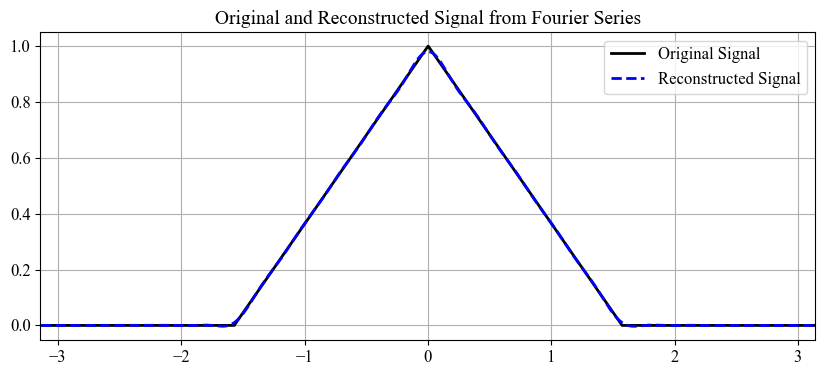

In [45]:
# Plot the original and reconstructed signal
plt.figure(figsize=(10,4))
plt.plot(x, f, '-', color='k', linewidth=2, label='Original Signal')
plt.plot(x, fFS, '--', color='b', linewidth=2, label='Reconstructed Signal')
plt.title('Original and Reconstructed Signal from Fourier Series', fontsize=14)
plt.xlim([-L, L])
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.show()

With only 20 coefficients, the original function and the reconstructed function are very close. Now, let's consider a new signal $x(t)$ defined from $0$ to $L$. This signal has abrupt changes, creating a non-continuous function. We will apply the Fourier transform to this non-periodic and non-continuous signal and observe the results.

In [46]:
# Define parameters
dx = 0.01
L = 2 * np.pi
x = np.arange(0, L + dx, dx)  # Interval from 0 to L
n = len(x)
nquart = int(np.floor(n / 4))

# Define the function f
f = np.zeros_like(x)
f[nquart:3*nquart] = 1 

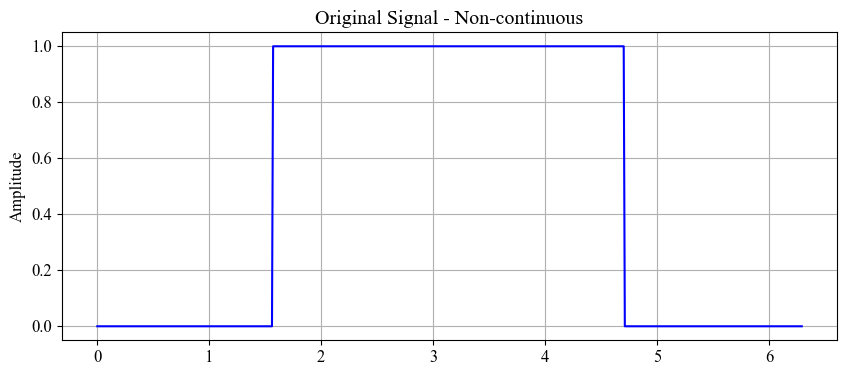

In [47]:
plt.figure(figsize=(10,4))
plt.plot(x, f, '-', color='b')
plt.title('Original Signal - Non-continuous')
plt.ylabel('Amplitude', fontsize=12)
plt.grid(True)
plt.show()

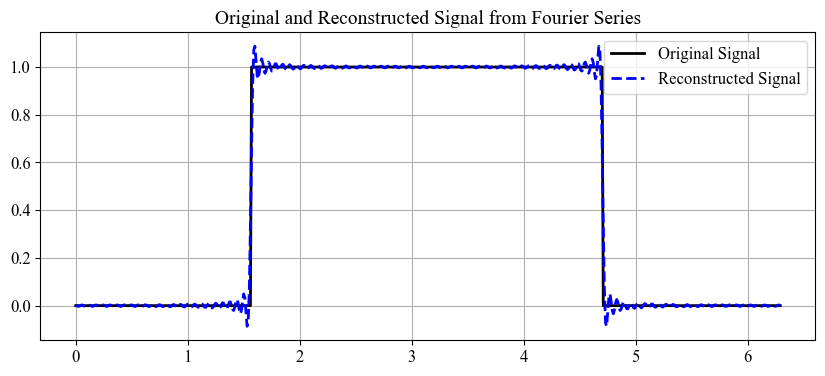

In [49]:
# Calculate the A0 coefficient
A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0 / 2 * np.ones_like(f)

# Loop to calculate the Fourier series
for k in range(1, 101):
    Ak = np.sum(f * np.cos(2 * np.pi * k * x / L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2 * np.pi * k * x / L)) * dx * 2 / L
    fFS = fFS + Ak * np.cos(2 * k * np.pi * x / L) + Bk * np.sin(2 * k * np.pi * x / L)

# Plot the original and reconstructed signal
plt.figure(figsize=(10,4))
plt.plot(x, f, '-', color='k', linewidth=2, label='Original Signal')
plt.plot(x, fFS, '--', color='b', linewidth=2, label='Reconstructed Signal')
plt.title('Original and Reconstructed Signal from Fourier Series', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.show()


The black curve represents a discontinuous signal, while the blue curve shows its Fourier approximation. The reconstructed signal exhibits ringing oscillations near the discontinuities, a phenomenon known as Gibbs phenomenon. Gibbs phenomenon is characterized by high-frequency oscillations that occur in the vicinity of discontinuities. This example highlights the challenges of applying the Fourier series to discontinuous functions.

### How to deal with Gibbs Phenomenon?

One effective technique to mitigate Gibbs phenomenon is windowing. Windowing involves multiplying the signal by a window function before computing its Fourier transform. Different window functions can be used to reduce the amplitude of the oscillations and achieve a smoother approximation. Another problem that can occour to non continuous and periodic signals is the Spectral leakage. The Spectral **leakage** occurs when the energy of a signal spreads to adjacent frequencies in the frequency domain. This happens due to the truncation of a continuous signal when it is sampled over a finite time period, leading to discontinuities at the boundaries of the sampled segment. These discontinuities cause the energy to "leak" into side lobes, making it difficult to accurately resolve the frequencies present in the signal.

Here, we compare the effects of three common window functions: Hamming, Hanning, and Blackman.

1. **Hamming Window**: The Hamming window is designed to minimize the side lobes in the frequency domain, reducing the impact of Gibbs phenomenon.

2. **Hanning Window**: The Hanning window (or Hann window) provides a good balance between main lobe width and side lobe level, making it suitable for many applications.

3. **Blackman Window**: The Blackman window has a very low side lobe level, which helps in achieving the smoothest approximation but at the cost of a wider main lobe.

The choice of window function involves a trade-off between reducing spectral leakage (side lobes) and maintaining frequency resolution (main lobe width). The optimal window depends on the specific requirements of the analysis and the nature of the signal being analyzed.

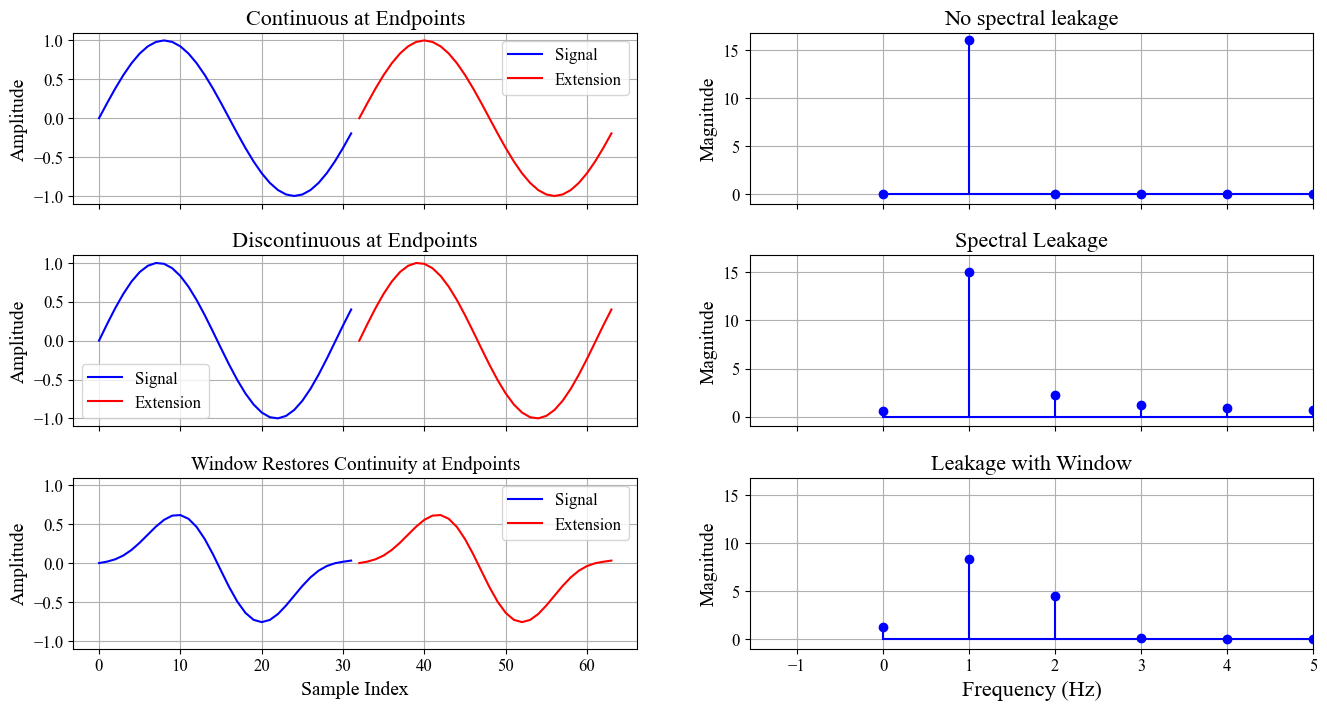

In [94]:
from scipy.fftpack import fft

# Signal parameters
fs = 32  # Sampling frequency (samples per second)
Ns = 32  # Number of samples

# Case 1: Continuous signal at endpoints
fo_continuous = 1  # Signal frequency for the continuous case
x_continuous = np.sin(2 * np.pi * fo_continuous / fs * np.arange(Ns))  # Sampled signal

# Case 2: Discontinuous signal at endpoints
fo_discontinuous = 1.1  # Signal frequency for the discontinuous case
x_discontinuous = np.sin(2 * np.pi * fo_discontinuous / fs * np.arange(Ns))  # Sampled signal

# Create subplots
fig, axs = plt.subplots(3, 2, sharex='col', sharey='col')
fig.set_size_inches((16, 8))
plt.subplots_adjust(hspace=.3)

# Plot the continuous signal at endpoints
ax = axs[0, 0]
ax.plot(np.arange(Ns), x_continuous, label='Signal', color='b')
ax.plot(np.arange(Ns) + Ns, x_continuous, label='Extension', color='r')
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_title('Continuous at Endpoints', fontsize=16)
ax.legend()
ax.grid(True)

# FFT of the continuous signal
ax = axs[0, 1]
N = Ns  # Number of FFT points (equal to the number of samples for perfect alignment)
Xm = np.abs(fft(x_continuous, N))  # Calculate the FFT
idx = int(fo_continuous / (fs / N))
ax.stem(np.arange(N) / N * fs, Xm, basefmt='b-', markerfmt='bo', linefmt='b-')
ax.set_ylabel('Magnitude', fontsize=14)
ax.set_xlim(xmax=5)
ax.set_ylim(ymin=-1)
ax.set_title('No spectral leakage', fontsize=16)
ax.grid(True)


# Plot the discontinuous signal at endpoints
ax = axs[1, 0]
ax.plot(np.arange(Ns), x_discontinuous, label='Signal', color='b')
ax.plot(np.arange(Ns) + Ns, x_discontinuous, label='Extension', color='r')
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_title('Discontinuous at Endpoints', fontsize=16)
ax.legend()
ax.grid(True)

# FFT of the discontinuous signal
ax = axs[1, 1]
Xm = np.abs(fft(x_discontinuous, N))  # Calculate the FFT
idx = int(fo_discontinuous / (fs / N))
ax.stem(np.arange(N) / N * fs, Xm, basefmt='b-', markerfmt='bo', linefmt='b-')
ax.set_ylabel('Magnitude', fontsize=14)
ax.set_title('Spectral Leakage', fontsize=16)
ax.set_xlim(xmax=5)
ax.set_ylim(ymin=-1)
ax.grid(True)

# Apply window to restore continuity
x_windowed = x_discontinuous * np.hamming(Ns)  # Apply Bartlett (triangular) window

# Plot the signal with window applied
ax = axs[2, 0]
ax.plot(np.arange(Ns), x_windowed, label='Signal', color='b')
ax.plot(np.arange(Ns) + Ns, x_windowed, label='Extension', color='r')
ax.set_xlabel('Sample Index', fontsize=14)
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_title('Window Restores Continuity at Endpoints', fontsize=14)
ax.legend()
ax.grid(True)

# FFT of the signal with window applied
ax = axs[2, 1]
Xm = np.abs(fft(x_windowed, N))  # Calculate the FFT
idx = int(fo_discontinuous / (fs / N))
ax.stem(np.arange(N) / N * fs, Xm, basefmt='b-', markerfmt='bo', linefmt='b-')
ax.set_xlabel('Frequency (Hz)', fontsize=16)
ax.set_ylabel('Magnitude', fontsize=14)
ax.set_title('Leakage with Window', fontsize=16)
ax.set_xlim(xmax=5)
ax.set_ylim(ymin=-1)
ax.grid(True)

plt.show()



In the figure above, the top row illustrates the ideal scenario where the sampling interval perfectly captures one period of the signal. This means the Fast Fourier Transform (FFT) bin aligns exactly with the signal's frequency. The FFT assumes the signal segment repeats seamlessly without any discontinuities. However, in practice, this alignment rarely occurs because the exact signal frequency is usually unknown beforehand, making perfect sampling impossible.

The second row demonstrates the more common case where the signal's period does not match the sampling interval, resulting in discontinuities at the segment boundaries. These discontinuities cause the FFT to spread the signal's energy into adjacent frequency bins, a phenomenon known as spectral leakage. This leakage distorts the frequency representation and introduces bias.

The third row shows the application of a window function to the signal, which reduces the discontinuity at the edges. While windowing does not completely eliminate spectral leakage, it mitigates its impact. Windows help in various ways, such as reducing side lobes and smoothing the signal. The following sections will delve into different window functions, their effects, and practical guidelines for choosing the appropriate window.

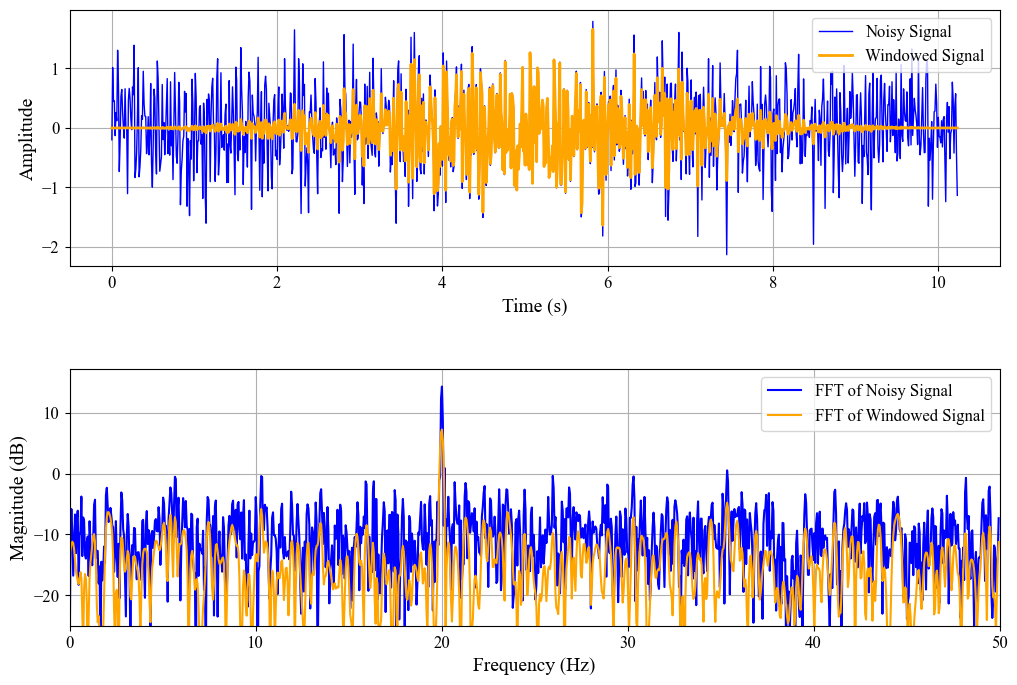

In [130]:
from src.utils import db20

# Parameters
N = 1024  # Number of points
fs = 100 # Sampling frequency in Hz
t = np.arange(N) / fs  # Time vector

# Frequencies of the signal components
f1 = 50  # Frequency of the first sine wave in Hz
f2 = 120  # Frequency of the second sine wave in Hz

# Create a noisy signal
signal = 0.7 * np.sin(2 * pi * f1 * t) + 0.5 * np.sin(2 * pi * f2 * t)
noise = np.random.normal(0, 0.5, N)  # White noise
noisy_signal = signal + noise

# Apply Blackman window
w = np.blackman(N)
windowed_signal = noisy_signal * w


# Plot setup
fig, ax = plt.subplots(2, 1)
fig.set_size_inches((12, 8))
plt.subplots_adjust(hspace=.4)

# Plot time-domain signals
ax[0].plot(t, noisy_signal, label='Noisy Signal', lw=1, color='b')
ax[0].plot(t, windowed_signal, label='Windowed Signal', lw=2, color='orange')
ax[0].set_ylabel('Amplitude', fontsize=14)
ax[0].legend(loc='upper right', fontsize=12)
ax[0].set_xlabel('Time (s)', fontsize=14)
ax[0].grid()

# Plot frequency-domain signals
Nfft = 2048  # FFT size for plot
frequencies = np.fft.fftfreq(Nfft, d=1/fs)[:Nfft//2]
ax[1].plot(frequencies, db20(noisy_signal, Nfft)[:Nfft//2], label='FFT of Noisy Signal', color='b')
ax[1].plot(frequencies, db20(windowed_signal, Nfft)[:Nfft//2], label='FFT of Windowed Signal', color='orange')
ax[1].set_xlim([0, fs/2])  # Plot up to Nyquist frequency
ax[1].set_ylim(ymin=-25)
ax[1].set_ylabel('Magnitude (dB)', fontsize=14)
ax[1].set_xlabel('Frequency (Hz)', fontsize=14)
ax[1].legend(loc='upper right', fontsize=12)
ax[1].grid()

plt.show()

As observed, windowing helps reduce spectral leakage by smoothing the discontinuities at the edges of the sampling interval. Although windowing can introduce a slight loss of frequency resolution due to the widening of the main lobe, it is generally beneficial for obtaining a more accurate representation of the frequency spectrum, particularly in noisy or non-periodic signals. One disadvantage of windowing is the reduction in signal power due to the attenuation introduced by the window function.